### Real Estate Price Prediction

#### Fire the System

In [874]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [875]:
# importing data

df_fl = pd.read_csv('florida_homes.csv')
df_id = pd.read_csv('idaho_homes.csv')
df_vi = pd.read_csv('virginia homes.csv')

#### Data Exploration

In [876]:
df_fl.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,sqft,stories,baths,baths_full_calc,beds,garage,listPrice,url
0,single_family,NaN,Charming Brick Home in Sought-After Wedgefield...,for_sale,1990.0,NaN,1990-11-01,10454.0,2507.0,2.0,3.0,2.0,3.0,2.0,450000.0,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Welcome to this beautifully refreshed 3-bedroo...,for_sale,1978.0,NaN,2003-08-29,87120.0,1145.0,1.0,2.0,2.0,3.0,NaN,235000.0,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Charming home is situated in the highly sought...,for_sale,2006.0,NaN,2017-06-21,7405.0,1319.0,1.0,2.0,2.0,2.0,1.0,154900.0,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,"Foreclosure Auction Ends June 24, 2025 at 11:0...",for_sale,1962.0,NaN,2014-09-03,NaN,2633.0,1.0,2.0,2.0,4.0,2.0,200000.0,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"Nestled on 2 acres in the heart of San Mateo, ...",for_sale,1889.0,NaN,2016-09-16,87120.0,4624.0,3.0,9.0,6.0,7.0,2.0,399000.0,https://www.realtor.com/realestateandhomes-det...


In [877]:
df_fl.shape

(6572, 16)

In [878]:
df_fl.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'sqft', 'stories', 'baths', 'baths_full_calc',
       'beds', 'garage', 'listPrice', 'url'],
      dtype='object')

In [879]:
df_fl.isnull().sum()

type                  0
sub_type           5713
text                 14
status                0
year_built          907
year_renovated     6572
soldOn             2154
lot_sqft           1189
sqft                482
stories             905
baths               254
baths_full_calc     440
beds                435
garage             1569
listPrice             9
url                   0
dtype: int64

In [880]:
df_id.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,sqft,stories,baths,baths_full,baths_full_calc,beds,garage,listPrice,url
0,single_family,NaN,Although the home is likely a tear-down due to...,for_sale,1993.0,NaN,NaN,49223.0,3564.0,1.0,3.0,3.0,3.0,3.0,2.0,324900.0,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Nestled on 2.25 serene acres just 45 minutes f...,for_sale,1996.0,NaN,2018-10-31,98010.0,2062.0,2.0,5.0,2.0,2.0,4.0,2.0,575000.0,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Secret Garden on Bonners Ferry's S Hill- Quain...,for_sale,1903.0,NaN,2015-08-14,6098.0,1068.0,2.0,1.0,1.0,1.0,2.0,1.0,325000.0,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,Alpine Model is available in 4 elevations; mod...,ready_to_build,NaN,NaN,NaN,NaN,2214.0,1.0,NaN,2.0,2.0,4.0,2.0,475000.0,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"Craftsman single level home with shop, guest a...",for_sale,2008.0,NaN,2003-10-02,101930.0,1292.0,1.0,2.0,2.0,2.0,2.0,2.0,769000.0,https://www.realtor.com/realestateandhomes-det...


In [881]:
df_id.shape

(6573, 17)

In [882]:
df_id.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'sqft', 'stories', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'garage', 'listPrice', 'url'],
      dtype='object')

In [883]:
df_id.isnull().sum()

type                  0
sub_type           6365
text                 31
status                0
year_built          917
year_renovated     6573
soldOn             3399
lot_sqft            279
sqft                714
stories            1314
baths                86
baths_full          736
baths_full_calc     723
beds                701
garage             1603
listPrice             1
url                   0
dtype: int64

In [884]:
df_vi.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,sqft,stories,baths,baths_full,baths_full_calc,beds,garage_max,listPrice,garage_min,garage_type,url
0,single_family,NaN,"Welcome to this one-owner, brick split-level h...",for_sale,1987.0,NaN,NaN,27007.0,2237.0,3.0,3.0,2.0,2.0,3.0,NaN,299900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Nestled in the lovely English Forest neighborh...,for_sale,1970.0,NaN,2013-09-19,10890.0,2504.0,1.0,2.0,2.0,2.0,3.0,NaN,249900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Welcome home to this beautifully updated 3-bed...,for_sale,1988.0,NaN,NaN,217800.0,2441.0,1.0,2.0,2.0,2.0,3.0,NaN,377000.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,ESTATE AUCTION!!!! AUCTION!!!! AUCTION!!!! Cas...,for_sale,1978.0,NaN,NaN,479160.0,2425.0,2.0,5.0,4.0,4.0,3.0,NaN,350000.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"One-of-a-kind artisan-style 3 bed, 3 bath home...",for_sale,2000.0,NaN,2023-08-28,78844.0,2208.0,1.0,3.0,3.0,3.0,3.0,NaN,349900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...


In [885]:
df_vi.shape

(6307, 19)

In [886]:
df_vi.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'sqft', 'stories', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'garage_max', 'listPrice', 'garage_min',
       'garage_type', 'url'],
      dtype='object')

In [887]:
df_vi.isnull().sum()

type                  2
sub_type           5686
text                 65
status                0
year_built          770
year_renovated     6307
soldOn             2440
lot_sqft            674
sqft                640
stories            1161
baths                86
baths_full          643
baths_full_calc     643
beds                584
garage_max         6307
listPrice            18
garage_min         6307
garage_type        6307
url                   0
dtype: int64

#### Data Preprocessing

In [888]:
# Feature selection

df_fl = df_fl[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]
df_id = df_id[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]
df_vi = df_vi[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]

df_fl['state'] = 'Florida'
df_id['state'] = 'Idaho'
df_vi['state'] = 'Virginia'

df_fl.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1990.0,1990-11-01,2507.0,2.0,3.0,3.0,450000.0,Florida
1,single_family,for_sale,1978.0,2003-08-29,1145.0,1.0,2.0,3.0,235000.0,Florida
2,single_family,for_sale,2006.0,2017-06-21,1319.0,1.0,2.0,2.0,154900.0,Florida
3,single_family,for_sale,1962.0,2014-09-03,2633.0,1.0,2.0,4.0,200000.0,Florida
4,single_family,for_sale,1889.0,2016-09-16,4624.0,3.0,9.0,7.0,399000.0,Florida


In [889]:
df_id.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1993.0,NaN,3564.0,1.0,3.0,3.0,324900.0,Idaho
1,single_family,for_sale,1996.0,2018-10-31,2062.0,2.0,5.0,4.0,575000.0,Idaho
2,single_family,for_sale,1903.0,2015-08-14,1068.0,2.0,1.0,2.0,325000.0,Idaho
3,single_family,ready_to_build,NaN,NaN,2214.0,1.0,NaN,4.0,475000.0,Idaho
4,single_family,for_sale,2008.0,2003-10-02,1292.0,1.0,2.0,2.0,769000.0,Idaho


In [890]:
df_vi.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1987.0,NaN,2237.0,3.0,3.0,3.0,299900.0,Virginia
1,single_family,for_sale,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
2,single_family,for_sale,1988.0,NaN,2441.0,1.0,2.0,3.0,377000.0,Virginia
3,single_family,for_sale,1978.0,NaN,2425.0,2.0,5.0,3.0,350000.0,Virginia
4,single_family,for_sale,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia


In [891]:
# concatinating 3 dataframes into one

df = pd.concat([df_vi,df_fl,df_id],axis=0)
df.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1987.0,NaN,2237.0,3.0,3.0,3.0,299900.0,Virginia
1,single_family,for_sale,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
2,single_family,for_sale,1988.0,NaN,2441.0,1.0,2.0,3.0,377000.0,Virginia
3,single_family,for_sale,1978.0,NaN,2425.0,2.0,5.0,3.0,350000.0,Virginia
4,single_family,for_sale,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia


In [892]:
df.shape

(19452, 10)

In [893]:
df.dtypes

type           object
status         object
year_built    float64
soldOn         object
sqft          float64
stories       float64
baths         float64
beds          float64
listPrice     float64
state          object
dtype: object

In [894]:
df.isnull().sum()

type             2
status           0
year_built    2594
soldOn        7993
sqft          1836
stories       3380
baths          426
beds          1720
listPrice       28
state            0
dtype: int64

In [895]:
df.nunique()

type            12
status           2
year_built     205
soldOn        5030
sqft          4359
stories         19
baths           24
beds            22
listPrice     3474
state            3
dtype: int64

In [896]:
df['type'].value_counts()

type
single_family                  15745
land                            1713
townhomes                       1003
condos                           725
multi_family                     134
farm                              73
condo_townhome                    26
townhouse                         13
condo_townhome_rowhome_coop       12
duplex_triplex                     3
condo                              2
apartment                          1
Name: count, dtype: int64

In [897]:
df['status'].value_counts()

status
for_sale          19053
ready_to_build      399
Name: count, dtype: int64

In [898]:
#filtering the dataset

df = df[df['status'] == 'for_sale']
df = df[df['type'] == 'single_family']

df.shape

(15389, 10)

In [899]:
df['soldOn'] = pd.to_datetime(df['soldOn'],dayfirst=True)
df.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16148\1688696545.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['soldOn'] = pd.to_datetime(df['soldOn'],dayfirst=True)


type                  object
status                object
year_built           float64
soldOn        datetime64[ns]
sqft                 float64
stories              float64
baths                float64
beds                 float64
listPrice            float64
state                 object
dtype: object

In [900]:
print(f'Earliest Sold on date: {df['soldOn'].min()}')
print(f'Latest Sold on date: {df['soldOn'].max()}')

Earliest Sold on date: 1954-10-08 00:00:00
Latest Sold on date: 2025-05-30 00:00:00


In [901]:
df = df[(df['soldOn'] >= '2005-01-01') & (df['soldOn'] < '2025-05-30')]
df.shape

(8592, 10)

In [902]:
df.isnull().sum()

type            0
status          0
year_built     44
soldOn          0
sqft           30
stories       561
baths           3
beds            0
listPrice       1
state           0
dtype: int64

In [903]:
# handling missing values and duplicales

df = df.dropna()
df = df.drop_duplicates()
df.shape

(7942, 10)

In [904]:
df = df.drop(['type','status'], axis=1) # dropping type and status columns as only one type of value was selected from both columns
df.head()

,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
1,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
4,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia
7,1974.0,2018-09-07,1756.0,1.0,2.0,3.0,450000.0,Virginia
8,1830.0,2018-05-01,2388.0,2.0,3.0,3.0,995000.0,Virginia
16,1991.0,2012-09-18,1695.0,2.0,2.0,4.0,380000.0,Virginia


#### Feature Engineering

In [905]:
# creating the feature of property_age

df['year_sold'] = df['soldOn'].dt.year.astype('float') # extracting only the year from the soldOn feature
df['property_age'] = df['year_sold'] - df['year_built']
df = df.drop(['year_built','year_sold','soldOn'],axis=1)
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age
1,2504.0,1.0,2.0,3.0,249900.0,Virginia,43.0
4,2208.0,1.0,3.0,3.0,349900.0,Virginia,23.0
7,1756.0,1.0,2.0,3.0,450000.0,Virginia,44.0
8,2388.0,2.0,3.0,3.0,995000.0,Virginia,188.0
16,1695.0,2.0,2.0,4.0,380000.0,Virginia,21.0


In [906]:
# creating price_per_lotsqft feature

df =df[df['sqft'] != 0]
df['price_per_sqft'] = df['listPrice']/df['sqft']
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age,price_per_sqft
1,2504.0,1.0,2.0,3.0,249900.0,Virginia,43.0,99.800319
4,2208.0,1.0,3.0,3.0,349900.0,Virginia,23.0,158.469203
7,1756.0,1.0,2.0,3.0,450000.0,Virginia,44.0,256.264237
8,2388.0,2.0,3.0,3.0,995000.0,Virginia,188.0,416.666667
16,1695.0,2.0,2.0,4.0,380000.0,Virginia,21.0,224.188791


In [907]:
# outlier removal based on price_per_sqft

def price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('state'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] <= (mean + 3*std)) & (subdf['price_per_sqft'] > (mean - 3*std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [908]:
df = price_per_sqft_outliers(df)
df.shape

(7818, 8)

In [909]:
# outlier removal based on inter quartile range

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1 # inter quartile range

df = df[(df['price_per_sqft'] > (Q1- 1.5*IQR)) & (df['price_per_sqft'] <= (Q3 + 1.5*IQR))]
df.shape

(7406, 8)

In [910]:
df['stories'].max()

5.0

In [911]:
# removing outliers based on unusual number of bathroom and bedrooms

df = df[(df['sqft'] > (df['baths']+df['beds'])*64)]
df.shape

(7406, 8)

In [912]:
df = df[~(df['baths'] > (df['beds'] +5))]
df.shape

(7406, 8)

In [913]:
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age,price_per_sqft
0,1319.0,1.0,2.0,2.0,154900.0,Florida,11.0,117.437453
1,2633.0,1.0,2.0,4.0,200000.0,Florida,52.0,75.958982
2,4624.0,3.0,9.0,7.0,399000.0,Florida,127.0,86.288927
3,2531.0,1.0,4.0,4.0,572490.0,Florida,49.0,226.191229
4,1909.0,1.0,2.0,3.0,499900.0,Florida,23.0,261.864851


In [914]:
df['state'].value_counts()

state
Florida     2760
Idaho       2365
Virginia    2281
Name: count, dtype: int64

#### Data Visualization

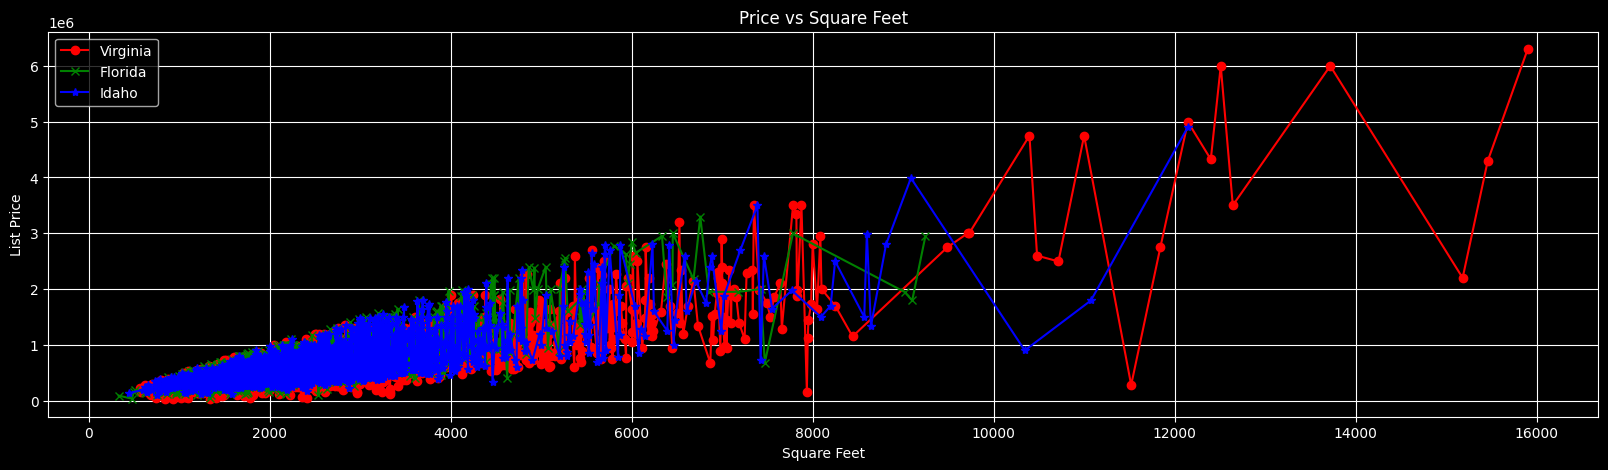

In [915]:
# visualizing sqft vs listprice

# Filter by state
df_vir = df[df['state'] == 'Virginia'].sort_values('sqft')
df_flo = df[df['state'] == 'Florida'].sort_values('sqft')
df_ida = df[df['state'] == 'Idaho'].sort_values('sqft')

# Plotting
plt.figure(figsize=(20,5))
plt.plot(df_vir['sqft'], df_vir['listPrice'], label='Virginia', color='red', marker='o')
plt.plot(df_flo['sqft'], df_flo['listPrice'], label='Florida', color='green', marker='x')
plt.plot(df_ida['sqft'], df_ida['listPrice'], label='Idaho', color='blue', marker='*')

plt.xlabel('Square Feet')
plt.ylabel('List Price')
plt.title('Price vs Square Feet')
plt.legend()
plt.grid(True)
plt.show()

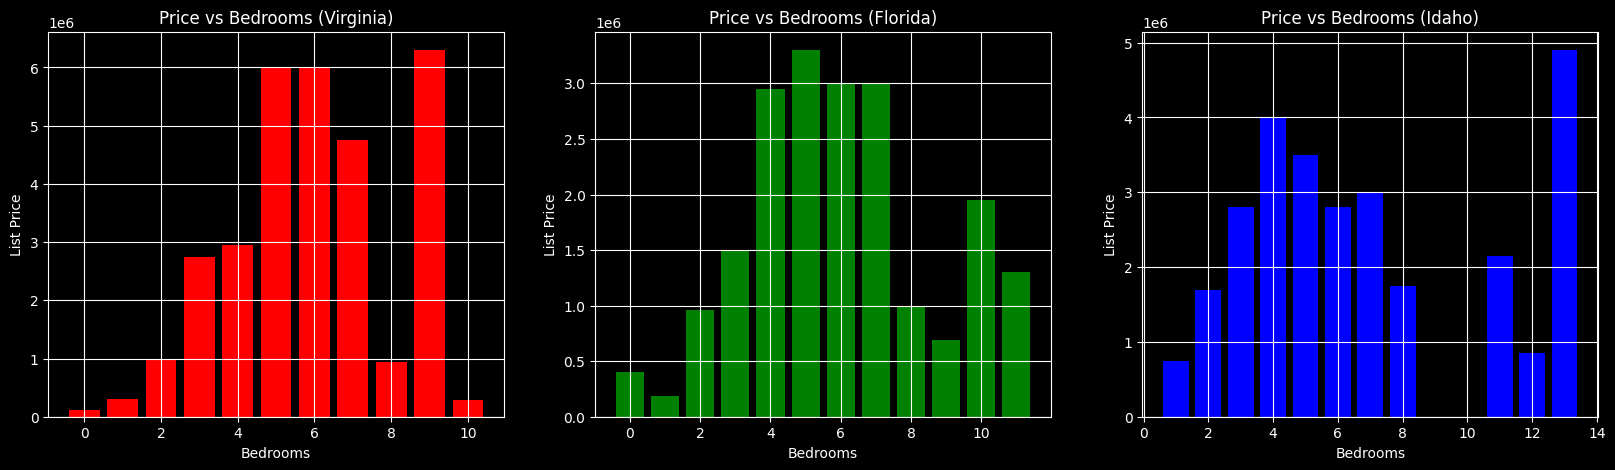

In [916]:
# visualizing bedrooms vs listprice

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(df_vir['beds'], df_vir['listPrice'], color='red')
axs[0].set_xlabel('Bedrooms')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Bedrooms (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['beds'], df_flo['listPrice'], color='green')
axs[1].set_xlabel('Bedrooms')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Bedrooms (Florida)')
axs[1].grid(True)

axs[2].bar(df_ida['beds'], df_ida['listPrice'], color='blue')
axs[2].set_xlabel('Bedrooms')
axs[2].set_ylabel('List Price')
axs[2].set_title('Price vs Bedrooms (Idaho)')
axs[2].grid(True)


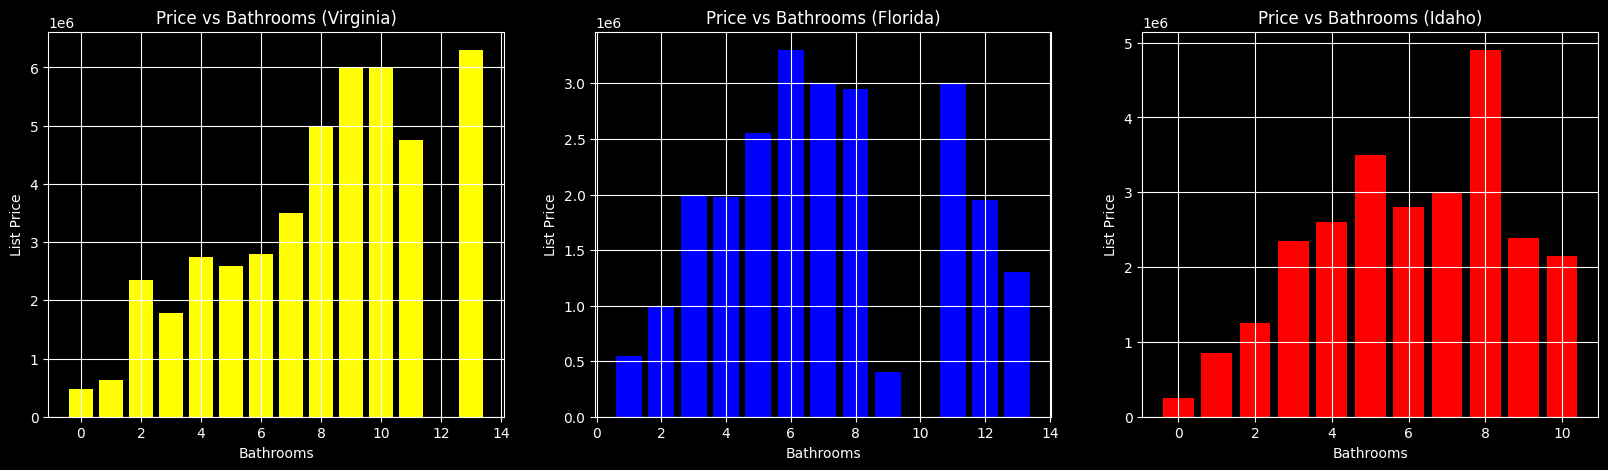

In [917]:
# visualizing bathrooms vs listprice

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(df_vir['baths'], df_vir['listPrice'], color='yellow')
axs[0].set_xlabel('Bathrooms')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Bathrooms (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['baths'], df_flo['listPrice'], color='blue')
axs[1].set_xlabel('Bathrooms')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Bathrooms (Florida)')
axs[1].grid(True)

axs[2].bar(df_ida['baths'], df_ida['listPrice'], color='red')
axs[2].set_xlabel('Bathrooms')
axs[2].set_ylabel('List Price')
axs[2].set_title('Price vs Bathrooms (Idaho)')
axs[2].grid(True)


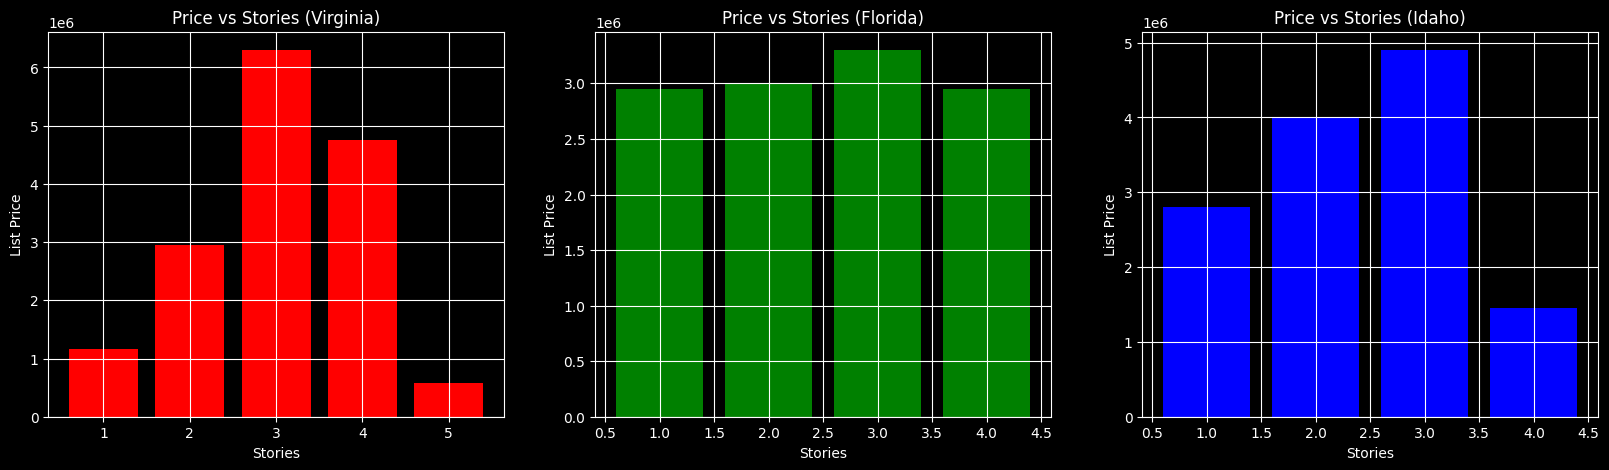

In [918]:
# visualizing stories vs listprice

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(df_vir['stories'], df_vir['listPrice'], color='red')
axs[0].set_xlabel('Stories')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Stories (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['stories'], df_flo['listPrice'], color='green')
axs[1].set_xlabel('Stories')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Stories (Florida)')
axs[1].grid(True)

axs[2].bar(df_ida['stories'], df_ida['listPrice'], color='blue')
axs[2].set_xlabel('Stories')
axs[2].set_ylabel('List Price')
axs[2].set_title('Price vs Stories (Idaho)')
axs[2].grid(True)


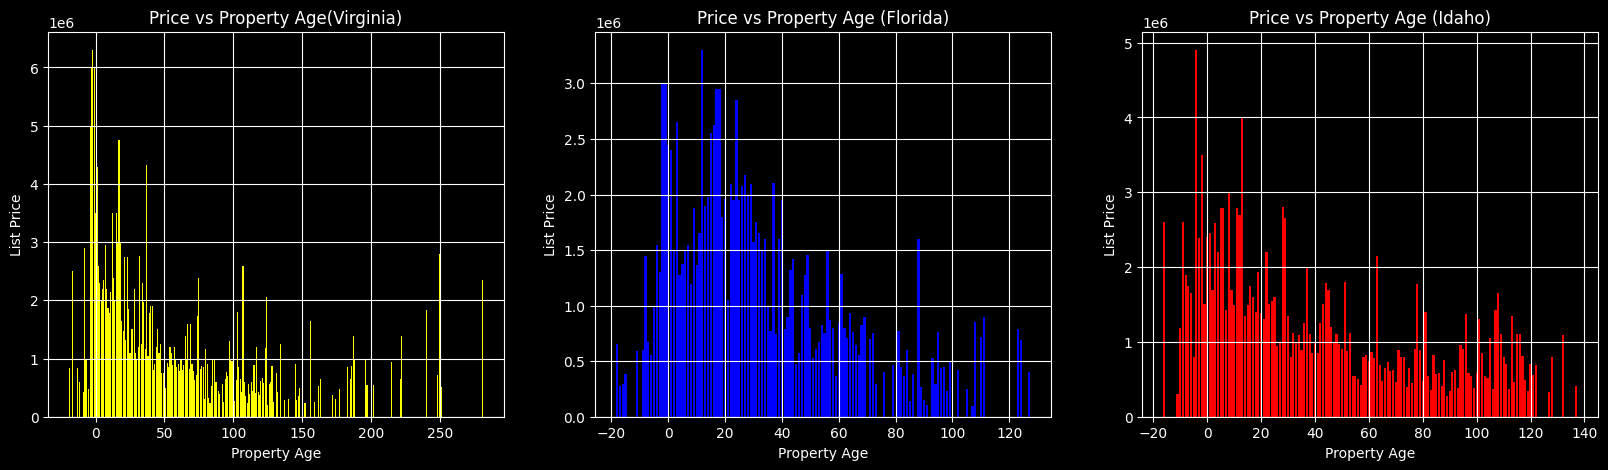

In [919]:
# visualizing property age vs listprice

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(df_vir['property_age'], df_vir['listPrice'], color='yellow')
axs[0].set_xlabel('Property Age')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Property Age(Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['property_age'], df_flo['listPrice'], color='blue')
axs[1].set_xlabel('Property Age')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Property Age (Florida)')
axs[1].grid(True)

axs[2].bar(df_ida['property_age'], df_ida['listPrice'], color='red')
axs[2].set_xlabel('Property Age')
axs[2].set_ylabel('List Price')
axs[2].set_title('Price vs Property Age (Idaho)')
axs[2].grid(True)

In [920]:
# dropping price per sqft feature 

df = df.drop(['price_per_sqft'],axis=1)
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age
0,1319.0,1.0,2.0,2.0,154900.0,Florida,11.0
1,2633.0,1.0,2.0,4.0,200000.0,Florida,52.0
2,4624.0,3.0,9.0,7.0,399000.0,Florida,127.0
3,2531.0,1.0,4.0,4.0,572490.0,Florida,49.0
4,1909.0,1.0,2.0,3.0,499900.0,Florida,23.0


### Normalization

In [921]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled = df.copy()
cols_to_scale = ['sqft','stories','baths','beds','property_age']

df_scaled[cols_to_scale] = sc.fit_transform(df[cols_to_scale])
df_scaled

,sqft,stories,baths,beds,listPrice,state,property_age
0,-0.894385,-0.799186,-0.697872,-1.630991,154900.0,Florida,-0.512515
1,0.158950,-0.799186,-0.697872,0.329587,200000.0,Florida,0.795593
2,1.754984,2.301271,4.796294,3.270453,399000.0,Florida,3.188474
3,0.077184,-0.799186,0.871890,0.329587,572490.0,Florida,0.699878
4,-0.421426,-0.799186,-0.697872,-0.650702,499900.0,Florida,-0.129654
...,...,...,...,...,...,...,...
7813,-1.031463,-0.799186,-1.482753,-1.630991,193000.0,Virginia,1.593220
7814,-0.088752,-0.799186,-0.697872,-0.650702,485000.0,Virginia,-0.129654
7815,0.320878,0.751042,0.087009,0.329587,1350000.0,Virginia,0.380827
7816,-0.739671,-0.799186,0.087009,-0.650702,539900.0,Virginia,0.604163


#### Label Encoding

In [922]:
dummies = pd.get_dummies(df_scaled['state'])
dummies = dummies.astype('int64')
dummies.head(2)

,Florida,Idaho,Virginia
0,1,0,0
1,1,0,0


In [923]:
df = pd.concat([dummies,df_scaled],axis = 1)
df = df.drop(['state'],axis = 1)
df.head(2)

,Florida,Idaho,Virginia,sqft,stories,baths,beds,listPrice,property_age
0,1,0,0,-0.894385,-0.799186,-0.697872,-1.630991,154900.0,-0.512515
1,1,0,0,0.158950,-0.799186,-0.697872,0.329587,200000.0,0.795593


#### Model Building and Training

In [924]:
x = df.drop(['listPrice'],axis = 1)
y = df.listPrice

In [925]:
# using gridsearch cv for hyperparameter tuning and cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def finding_the_best_model(x,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params' : {
                'fit_intercept' : [True,False]
                        }
                            },

        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
                        }
                 },

        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['random','best']
                     }
                        },
                    
        'random_forest' : {
            'model' : RandomForestRegressor(),
            'params': {
                'n_estimators' : [100,200],
                'max_depth' : [20,30],
                'max_features' : ['sqrt','auto']
            }
        }
        }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for algo_name,config  in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])

In [926]:
table = finding_the_best_model(x,y)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

In [927]:
table

,model,best_score,best_params
0,linear_regression,0.677988,{'fit_intercept': False}
1,lasso,0.677989,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.472022,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.708758,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e..."


In [928]:
table['best_params'][3]

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}

In [934]:
# best model is randomforest

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rm = RandomForestRegressor(max_depth= 20, 
                           max_features= 'sqrt', 
                           n_estimators= 200)
rm_model = rm.fit(x_train,y_train)
rm_model.score(x_test,y_test)

0.7163564088535487

#### Predict Function

In [935]:
x.head(2)

,Florida,Idaho,Virginia,sqft,stories,baths,beds,property_age
0,1,0,0,-0.894385,-0.799186,-0.697872,-1.630991,-0.512515
1,1,0,0,0.158950,-0.799186,-0.697872,0.329587,0.795593


In [936]:
def predict(sqft, stories, bathrooms, bedrooms, property_age, state):
   
    features = np.array([[sqft, stories, bathrooms, bedrooms, property_age]])
    features_scaled = sc.transform(features)[0]  

    x1 = np.zeros(len(x.columns))  

    x1[2] = features_scaled[0]   
    x1[3] = features_scaled[1]   
    x1[4] = features_scaled[2]   
    x1[5] = features_scaled[3]   
    x1[6] = features_scaled[4]   

    state_index = np.where(x.columns == state)[0][0]
    x1[state_index] = 1

    # Predict and return the result
    return rm_model.predict([x1])[0]

In [937]:
predict(2500,2,3,4,20,'Virginia')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


625038.05